In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
# 1. VERİ SETİNİ TANIMLAMA
data = {
    'N1': [-6, -3], 'N2': [-2, 2], 'N3': [-4, 1], 'N4': [-2, -6],
    'N5': [3, 5],   'N6': [2, 6],  'N7': [6, -2], 'N8': [1, 6]
}
X = np.array(list(data.values()))
labels = list(data.keys())

In [3]:
# 2. BAŞLANGIÇ MERKEZLERİ
centroids = np.array([[-2, -4], [4, 4]]) # C1 ve C2

In [4]:
print(f"Başlangıç Merkezleri: C1={centroids[0]}, C2={centroids[1]}\n")

Başlangıç Merkezleri: C1=[-2 -4], C2=[4 4]



In [5]:
# 3. İTERASYON 1: MESAFE HESABI VE ATAMA
# Her noktanın merkezlere uzaklığını hesapla (Öklid)
distances = cdist(X, centroids, 'euclidean')

In [6]:
# Hangi merkeze daha yakın? (0 = C1, 1 = C2)
clusters = np.argmin(distances, axis=1)

In [7]:
# --- SONUÇLARI TABLOYA DÖKELİM ---
df = pd.DataFrame(X, columns=['X', 'Y'], index=labels)
df['Uzaklık_C1'] = distances[:, 0]
df['Uzaklık_C2'] = distances[:, 1]
df['Atanan_Küme'] = ['C1' if c == 0 else 'C2' for c in clusters]

print("--- İterasyon 1 Sonuç Tablosu ---")
print(df)

--- İterasyon 1 Sonuç Tablosu ---
    X  Y  Uzaklık_C1  Uzaklık_C2 Atanan_Küme
N1 -6 -3    4.123106   12.206556          C1
N2 -2  2    6.000000    6.324555          C1
N3 -4  1    5.385165    8.544004          C1
N4 -2 -6    2.000000   11.661904          C1
N5  3  5   10.295630    1.414214          C2
N6  2  6   10.770330    2.828427          C2
N7  6 -2    8.246211    6.324555          C2
N8  1  6   10.440307    3.605551          C2


In [9]:
# 4. YENİ MERKEZLERİ HESAPLAMA
new_centroids = []
for i in range(2):
    # O kümeye atanan noktaları bul
    points = X[clusters == i]
    # Ortalamasını al
    center = points.mean(axis=0)
    new_centroids.append(center)

print(f"\nGüncellenmiş Merkezler:")
print(f"Yeni C1: {new_centroids[0]}")
print(f"Yeni C2: {new_centroids[1]}")


Güncellenmiş Merkezler:
Yeni C1: [-3.5 -1.5]
Yeni C2: [3.   3.75]


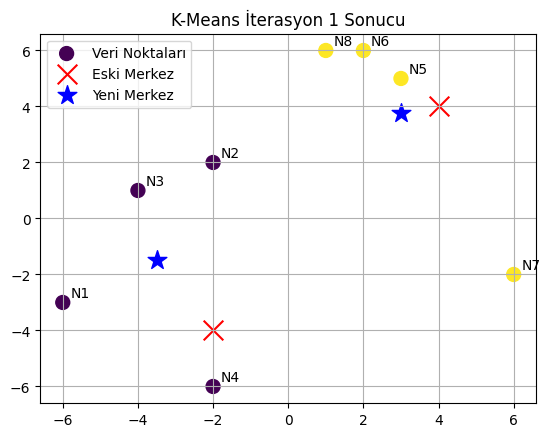

In [10]:
# 5. GÖRSELLEŞTİRME
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis', s=100, label='Veri Noktaları')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200, label='Eski Merkez')
plt.scatter(np.array(new_centroids)[:,0], np.array(new_centroids)[:,1], c='blue', marker='*', s=200, label='Yeni Merkez')
for i, txt in enumerate(labels):
    plt.annotate(txt, (X[i,0]+0.2, X[i,1]+0.2))
plt.legend()
plt.grid(True)
plt.title("K-Means İterasyon 1 Sonucu")
plt.show()

### 📊 Sonuçların Yorumlanması

Bu analizde $k=2$ seçerek veriyi iki ana kümeye ayırdık.

1.  **Başlangıç Durumu:** Rastgele seçilen $C_1(-2, -4)$ ve $C_2(4, 4)$ merkezleri, verinin dağılımına göre biraz uç noktalardaydı.
2.  **İlk İterasyon:** Algoritma, her noktayı en yakın merkeze atadı.
    * Özellikle $N_1$ ve $N_4$ gibi sol alt köşedeki noktalar, beklendiği gibi $C_1$ kümesine dahil oldu.
    * Sağ üstteki $N_5, N_6, N_8$ gibi noktalar $C_2$ kümesini oluşturdu.
3.  **Merkez Kayması (Centroid Shift):** Kodun hesapladığı yeni merkezler:
    * **Yeni $C_1$:** $(-3.5, -1.5)$
    * **Yeni $C_2$:** $(3.0, 3.75)$
    * **Analiz:** Merkezlerin, kendilerine atanan noktaların "ağırlık merkezine" doğru kaydığını görüyoruz. $C_1$ yukarı ve sağa, $C_2$ ise aşağı ve sola (noktaların yoğun olduğu yere) hareket etti. Bu, algoritmanın kümeyi optimize etmeye başladığını gösterir.